# Convolutional Neural Networks

---

In this notebook, we train an MLP to classify images from the MNIST database.

### 1. Load MNIST Database

In [55]:
from keras.datasets import mnist

# use Keras to import pre-shuffled MNIST database
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("The MNIST database has a training set of %d examples." % len(X_train))
print("The MNIST database has a test set of %d examples." % len(X_test))

The MNIST database has a training set of 60000 examples.
The MNIST database has a test set of 10000 examples.


### 2. Visualize the First Six Training Images

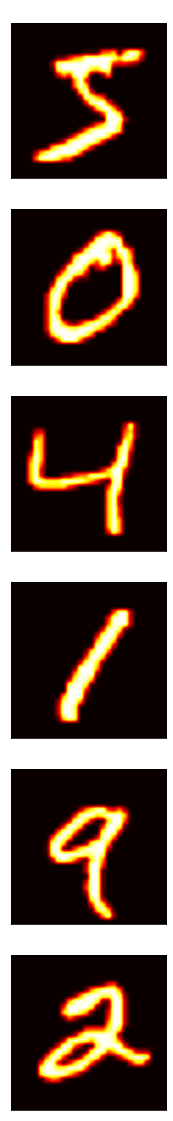

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

# plot first six training images
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(6, 1, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='hot', interpolation='hamming')
    ax.set_title(str(y_train[i]), color='white')

### 3. View an Image in More Detail

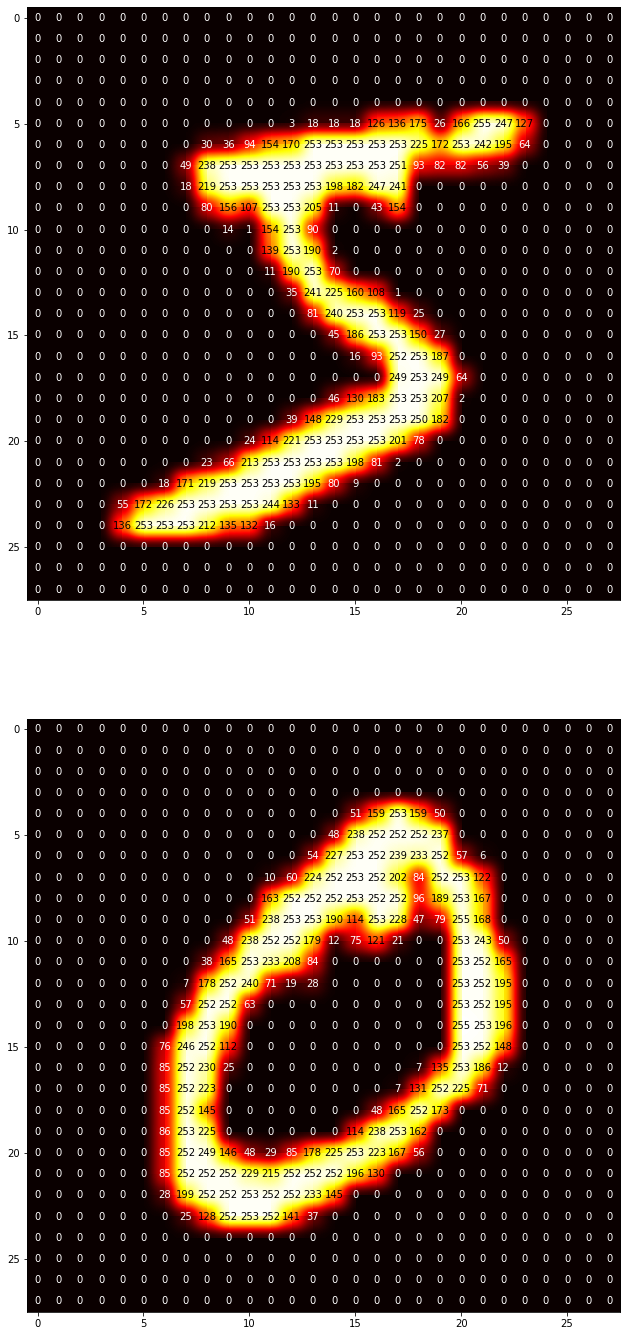

In [35]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='hot', interpolation='hamming')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (24,24)) 
ax = fig.add_subplot(2, 1, 1)
visualize_input(X_train[0], ax)
ax=fig.add_subplot(2, 1, 2)
visualize_input(X_train[1], ax)

### 4. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [56]:
# rescale [0,255] --> [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255 

### 5. Encode Categorical Integer Labels Using a One-Hot Scheme

In [57]:
from keras.utils import np_utils

# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

# one-hot encode the labels
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# print first ten (one-hot) training labels
print('One-hot labels:')
print(y_train[:10])

Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4]
One-hot labels:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


### 6. Define the Model Architecture

In [58]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

# define the model
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# summarize the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


### 7. Compile the Model

In [59]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

### 8. Calculate the Classification Accuracy on the Test Set (Before Training)

In [60]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 5.8000%


### 9. Train the Model

In [61]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', 
                               verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=10,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=1, shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 13s 270us/step - loss: 0.2771 - acc: 0.9175 - val_loss: 0.1237 - val_acc: 0.9621

Epoch 00001: val_loss improved from inf to 0.12372, saving model to mnist.model.best.hdf5
Epoch 2/10
48000/48000 [==============================] - 10s 212us/step - loss: 0.1097 - acc: 0.9656 - val_loss: 0.0922 - val_acc: 0.9712

Epoch 00002: val_loss improved from 0.12372 to 0.09219, saving model to mnist.model.best.hdf5
Epoch 3/10
48000/48000 [==============================] - 10s 216us/step - loss: 0.0777 - acc: 0.9764 - val_loss: 0.0864 - val_acc: 0.9737

Epoch 00003: val_loss improved from 0.09219 to 0.08641, saving model to mnist.model.best.hdf5
Epoch 4/10
48000/48000 [==============================] - 10s 218us/step - loss: 0.0601 - acc: 0.9807 - val_loss: 0.0847 - val_acc: 0.9748

Epoch 00004: val_loss improved from 0.08641 to 0.08474, saving model to mnist.model.best.hdf5
Epoch 5/10
48000/4

### 10. Load the Model with the Best Classification Accuracy on the Validation Set

In [63]:
# load the weights that yielded the best validation accuracy
model.load_weights('mnist.model.best.hdf5')

### 11. Calculate the Classification Accuracy on the Test Set

In [64]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 98.0900%
